In [9]:
%reload_ext autoreload
%autoreload 2

In [10]:
import utils
import numpy as np
from utils import load_nasdaq, study_results, pct_deviation
#import random
#import pandas as pd 
from pylab import mpl, plt
import math
import torch
from sklearn.metrics import mean_squared_error
import os
import optuna
import joblib

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

        
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
use_dif = False
nasdaq, scaled, scaler1, scaler2  = load_nasdaq(use_dif=use_dif)  

In [12]:
nasdaq

,Close,Assets
Date,,
2002-12-18,1013.669983,719542.0
2003-01-08,1042.520020,723762.0
2003-01-15,1073.599976,720074.0
2003-01-22,1006.510010,735953.0
2003-01-29,1016.559998,712809.0
...,...,...
2021-05-26,13702.740234,7903541.0
2021-06-02,13675.790039,7935703.0
2021-06-09,13814.940430,7952327.0


In [13]:
scaled

,Close,Assets
Date,,
2002-12-18,0.071014,0.088811
2003-01-08,0.073035,0.089332
2003-01-15,0.075212,0.088877
2003-01-22,0.070512,0.090837
2003-01-29,0.071216,0.087980
...,...,...
2021-05-26,0.959963,0.975512
2021-06-02,0.958075,0.979481
2021-06-09,0.967823,0.981533


In [14]:
x_test, y_test, x_train, y_train, x_val, y_val, train_loader = utils.load_data(nasdaq, 10, device, 8)
print(len(train_loader))
print('Example test data shape: ', x_test.shape)
print('Example validation data shape: ',x_val.shape)
print('Example train data shape: ',x_train.shape)
print('Example test target shape: ',y_test.shape)
print('Example train target shape: ',y_train.shape)

72
Example test data shape:  torch.Size([189, 10, 2])
Example validation data shape:  torch.Size([189, 10, 2])
Example train data shape:  torch.Size([569, 10, 2])
Example test target shape:  torch.Size([189, 1])
Example train target shape:  torch.Size([569, 1])


# Prediction with GRU

In [15]:
res_dir = 'studies'
ending = '_pctloss.pkl'


study_gru = joblib.load(os.path.join(res_dir,'study_gru'+ending))
optuna.visualization.plot_param_importances(study_gru)

Best trial:
Validation Loss:  2.1489482605829835e-05
Best trial Parameters:
{'Look Back': 50, 'Batch Size': 16, 'Hidden Dim': 92, 'N layers': 2, 'Learning Rate': 0.0009992835804817496, 'Factor': 0.65}

Training Loss:
Last Epoch 84 Loss:  0.019346836688263074


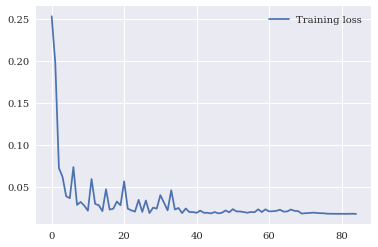



Model Train Score: 126.59 RMSE
Model Train Percentage Points deviation: 1.92%

Model Validation Score: 127.55 RMSE
Model Validation Percentage Points deviation: 1.81%

Model Test Score: 163.87 RMSE
Model Test Percentage Points deviation: 1.90%

Aggregated Score: 135.04 RMSE
Aggregated Percentage Points deviation: 1.89%




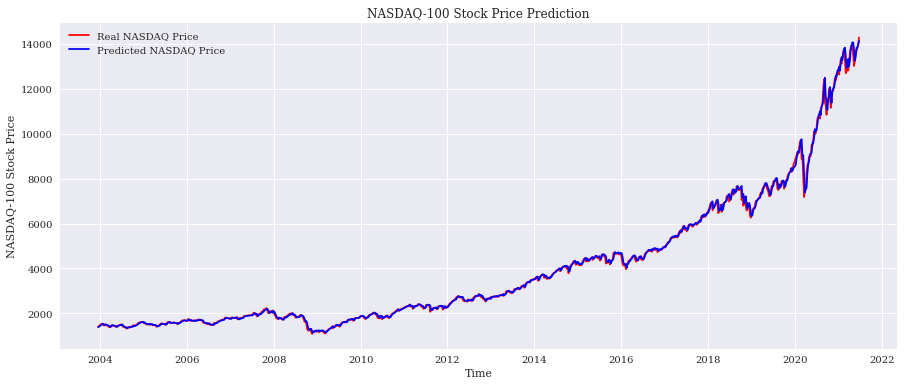

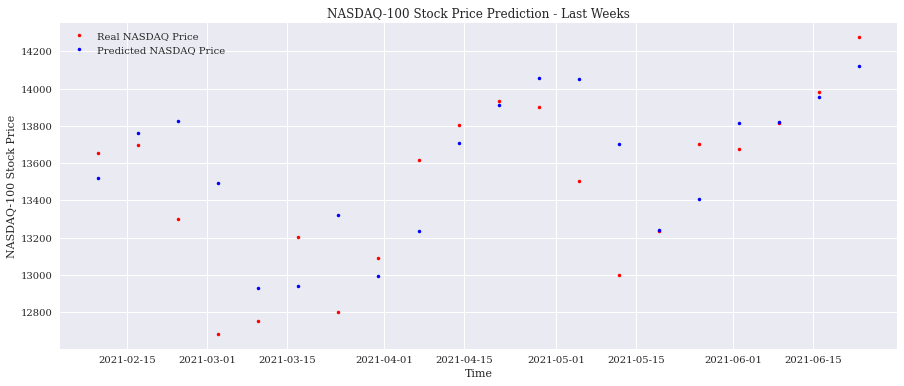

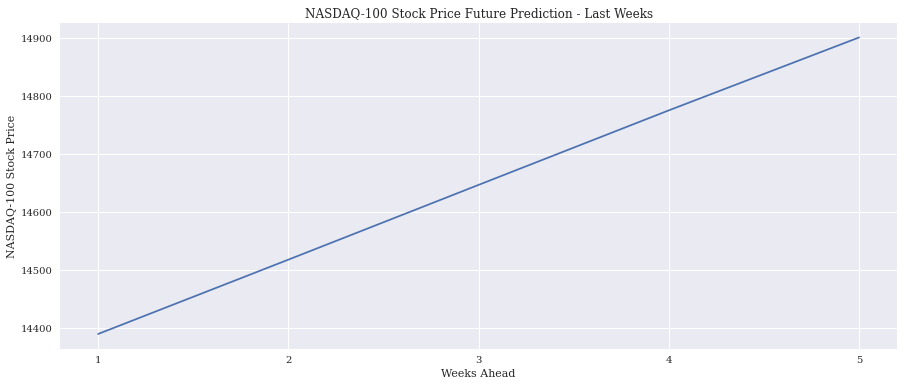

[14390.2734375, 14518.2158203125, 14646.9384765625, 14775.255859375, 14900.7490234375]


In [16]:
use_fed_data = True
model_name = 'GRU'
study_results(study_gru,model_name, use_fed_data, use_dif, device)

# Prediction with LSTM

Best trial:
Validation Loss:  0.016743041574954987
Best trial Parameters:
{'Look Back': 55, 'Batch Size': 20, 'Hidden Dim': 60, 'N layers': 1, 'Learning Rate': 0.011948517716782759, 'Factor': 0.55}

Training Loss:
Last Epoch 99 Loss:  0.018673455508958017


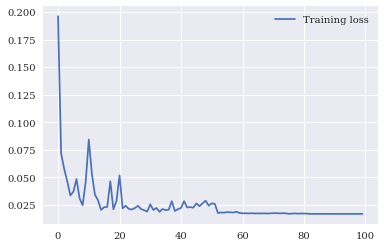



Model Train Score: 126.67 RMSE
Model Train Percentage Points deviation: 1.88%

Model Validation Score: 119.59 RMSE
Model Validation Percentage Points deviation: 1.67%

Model Test Score: 167.22 RMSE
Model Test Percentage Points deviation: 2.07%

Aggregated Score: 134.44 RMSE
Aggregated Percentage Points deviation: 1.88%




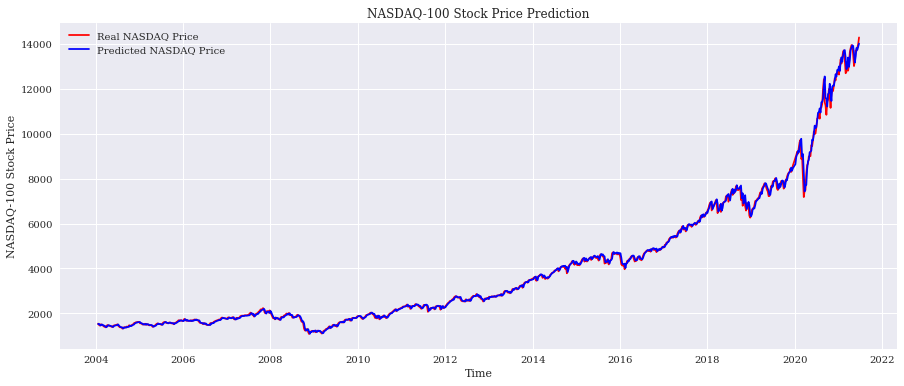

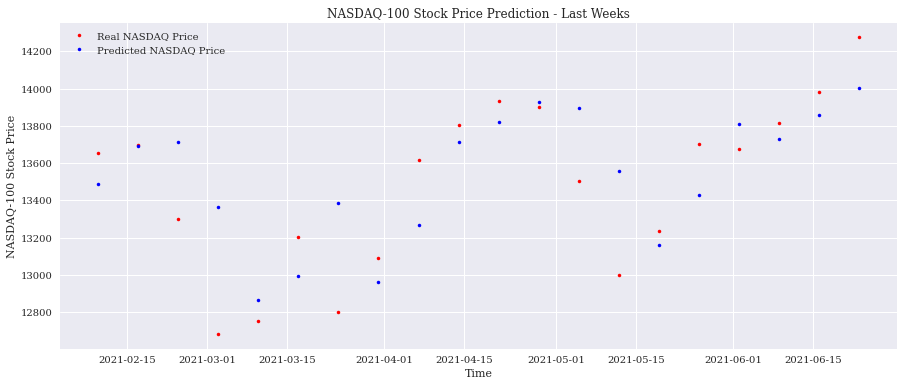

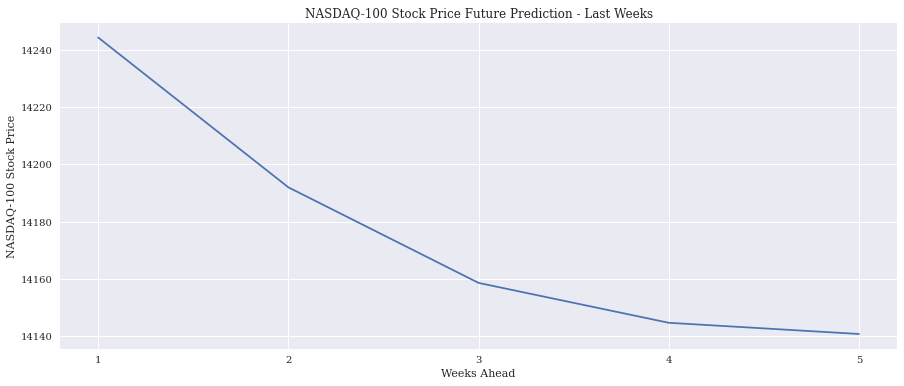

[14244.37890625, 14191.9814453125, 14158.5546875, 14144.609375, 14140.6982421875]


In [17]:
study_lstm = joblib.load(os.path.join(res_dir,'study_lstm'+ending))
model_name = 'LSTM'
study_results(study_lstm,model_name, use_fed_data, use_dif, device)

# Prediction with GRU without Fed Data

Best trial:
Validation Loss:  0.005652237217873335
Best trial Parameters:
{'Look Back': 50, 'Batch Size': 16, 'Hidden Dim': 61, 'N layers': 1, 'Learning Rate': 0.007103880027778249, 'Factor': 0.55}

Training Loss:
Last Epoch 84 Loss:  0.018860304541885854


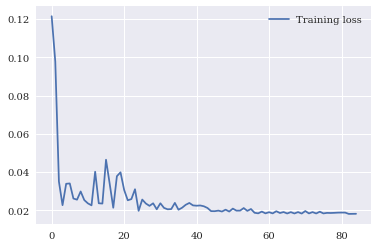



Model Train Score: 126.28 RMSE
Model Train Percentage Points deviation: 1.90%

Model Validation Score: 130.79 RMSE
Model Validation Percentage Points deviation: 1.82%

Model Test Score: 164.75 RMSE
Model Test Percentage Points deviation: 1.85%

Aggregated Score: 135.69 RMSE
Aggregated Percentage Points deviation: 1.87%




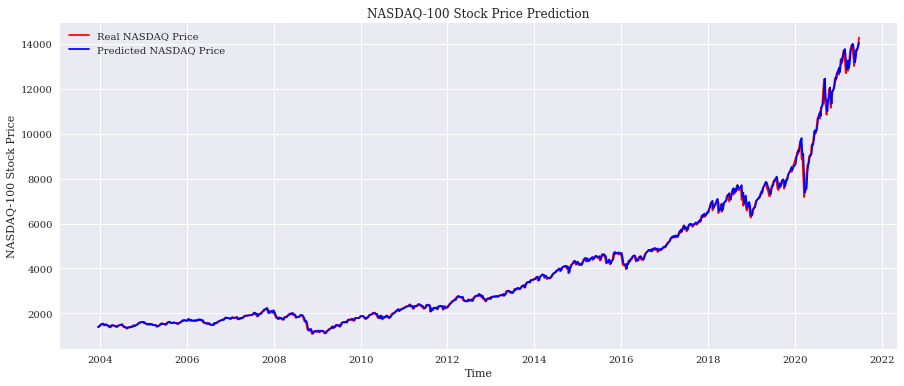

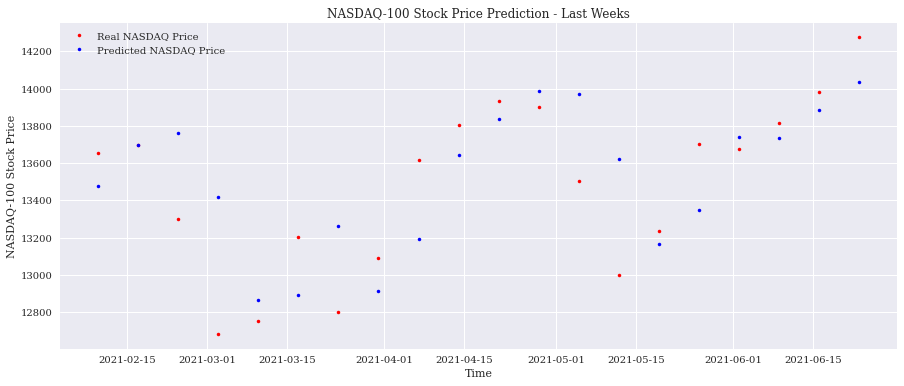

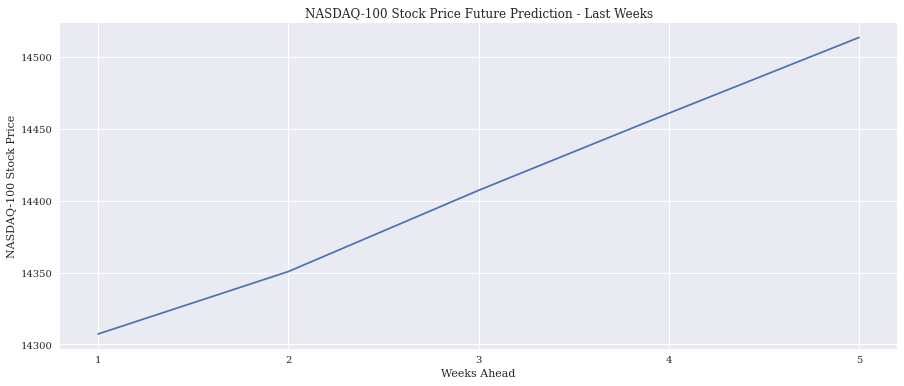

[14307.3046875, 14350.8017578125, 14407.37890625, 14461.0986328125, 14513.8935546875]


In [18]:
study_gru_no_fed = joblib.load(os.path.join(res_dir,'study_gru_no_fed'+ending))
use_fed_data = False
model_name = 'GRU'
study_results(study_gru_no_fed,model_name, use_fed_data, use_dif, device)

# Prediction with LSTM without Fed Data

Best trial:
Validation Loss:  0.0174726452678442
Best trial Parameters:
{'Look Back': 55, 'Batch Size': 26, 'Hidden Dim': 121, 'N layers': 1, 'Learning Rate': 0.003162973304953208, 'Factor': 0.65}

Training Loss:
Last Epoch 99 Loss:  0.019420781571950232


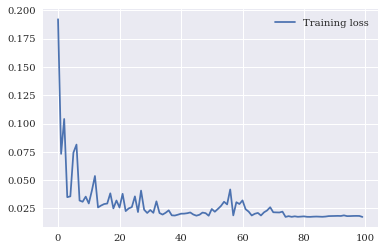



Model Train Score: 130.39 RMSE
Model Train Percentage Points deviation: 1.89%

Model Validation Score: 132.82 RMSE
Model Validation Percentage Points deviation: 1.75%

Model Test Score: 153.01 RMSE
Model Test Percentage Points deviation: 2.01%

Aggregated Score: 135.68 RMSE
Aggregated Percentage Points deviation: 1.88%




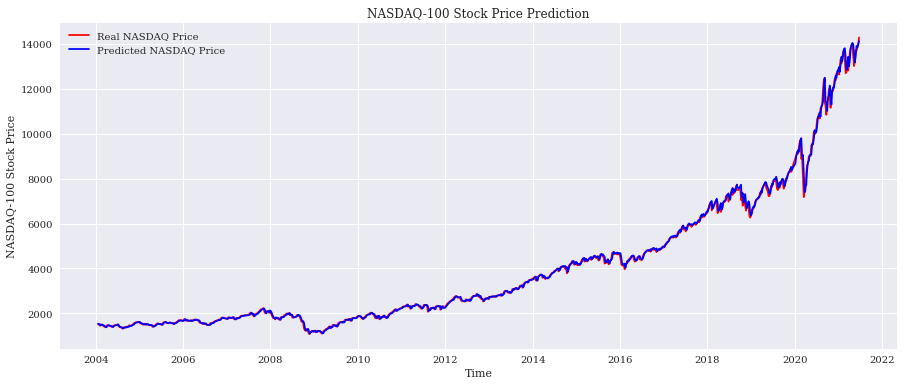

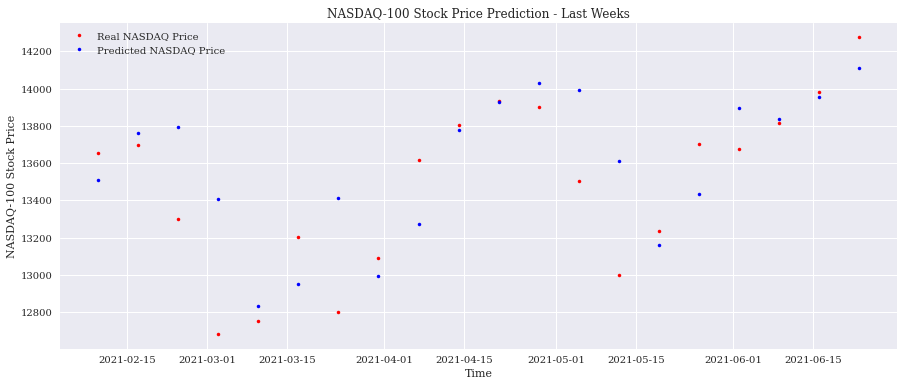

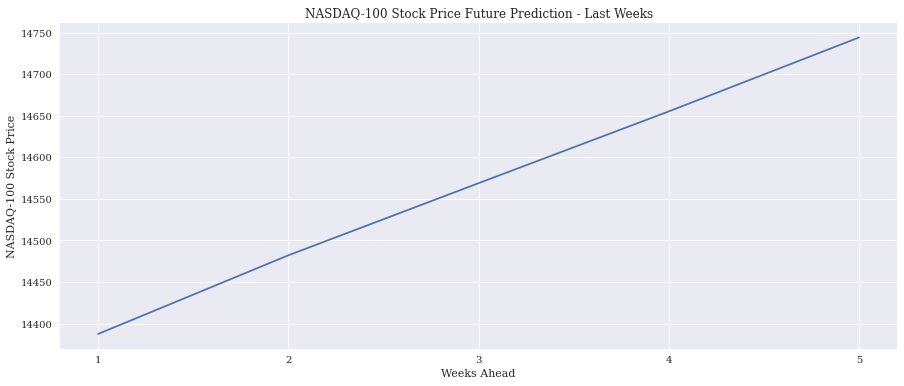

[14387.4375, 14482.1533203125, 14568.978515625, 14655.3779296875, 14744.3896484375]


In [19]:
study_lstm_no_fed = study_gru_no_fed = joblib.load(os.path.join(res_dir,'study_lstm_no_fed'+ending))
model_name = 'LSTM'
study_results(study_lstm_no_fed,model_name, use_fed_data, use_dif, device)

# Naive Predictor

In [20]:
dt = nasdaq.index[-1]-nasdaq.index[0]
dt = int(dt.days/7)
avg_weekly_gain = (nasdaq.iloc[-1,0]/nasdaq.iloc[0,0])**(1/dt)
#dt = len(nasdaq)
print('Nasdaq avegage weekly gain: %.4f' % (avg_weekly_gain))
dates = nasdaq.index
d0 = dates[0]
#naive = nasdaq.iloc[0,0]*avg_weekly_gain**((dates-d0).days/7)
naive = nasdaq['Close']*avg_weekly_gain
naiveScore = math.sqrt(mean_squared_error(naive[:-1], nasdaq['Close'][1:]))
pctScore = pct_deviation(np.array(naive[:-1]),np.array(nasdaq['Close'][1:]))
#print(pctScore.dtype)
print('Naive Predictor Score: %.2f RMSE' % (naiveScore))
print('Naive Predictor Percentage Score: %.2f%%' % (float(100*pctScore)))

Nasdaq avegage weekly gain: 1.0027
Naive Predictor Score: 131.68 RMSE
Naive Predictor Percentage Score: 1.93%


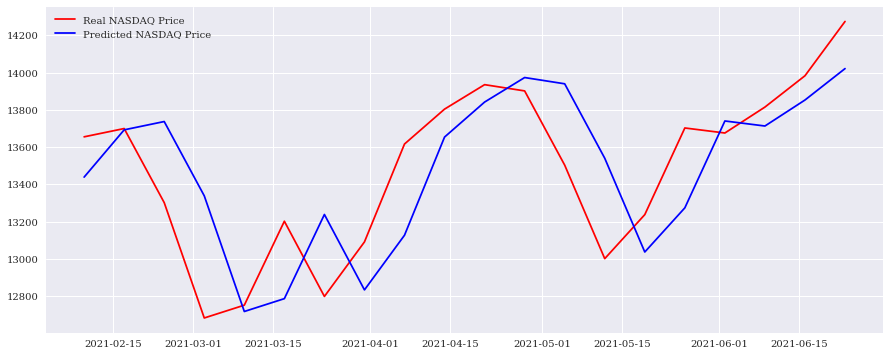

In [21]:
figure, axes = plt.subplots(figsize=(15, 6))
last = 20
axes.xaxis_date()
axes.plot(nasdaq[-last:].index, nasdaq['Close'][-last:], color = 'red', label = 'Real NASDAQ Price')
axes.plot(nasdaq[-last:].index, naive[-last-1:-1], color = 'blue', label = 'Predicted NASDAQ Price')
plt.legend()